## <font color='purple'> Purpose of Notebook: BSA Scatter Plot Challenge!</font>
**Notebook by:** Biviana Oseguera <br>
**Date:** 07/24/2024 <br>
**Uses:** <br>  star_data_full.csv <br>
**Generates:**   Scatterplot of a simulated star field with respect to the Right Ascension and Declination

In [1]:
import numpy as np  #to use array
from astropy.io import ascii  #to read and load the data files added
import matplotlib.pyplot as plt   #to create plots
import matplotlib.lines as mlines # for the legend

In [2]:
tick_font_size = 20
fontsize = 20

In [9]:
# stars = 'C:\\Users\\boseg\\Desktop\\BSA_2024\\star_data_full.csv'
stars = 'star_data_full.xls'
t_stars = ascii.read(stars, guess=True)

In [10]:
t_stars.keys()

['Right Ascension', 'Declination', 'Magnitude', 'Mass', 'Age', 'Spectral Type']

In [11]:
RA = t_stars['Right Ascension'] # degrees
RA = np.array(RA)
Dec = t_stars['Declination'] # degrees
Dec = np.array(Dec)
Mag = t_stars['Magnitude']
Mag = np.array(Mag)
Mass = t_stars['Mass'] #solar masses
Mass = np.array(Mass)
Age = t_stars['Age'] # Billion Years
Age = np.array(Age)
Stype = t_stars['Spectral Type']
Stype = np.array(Stype)

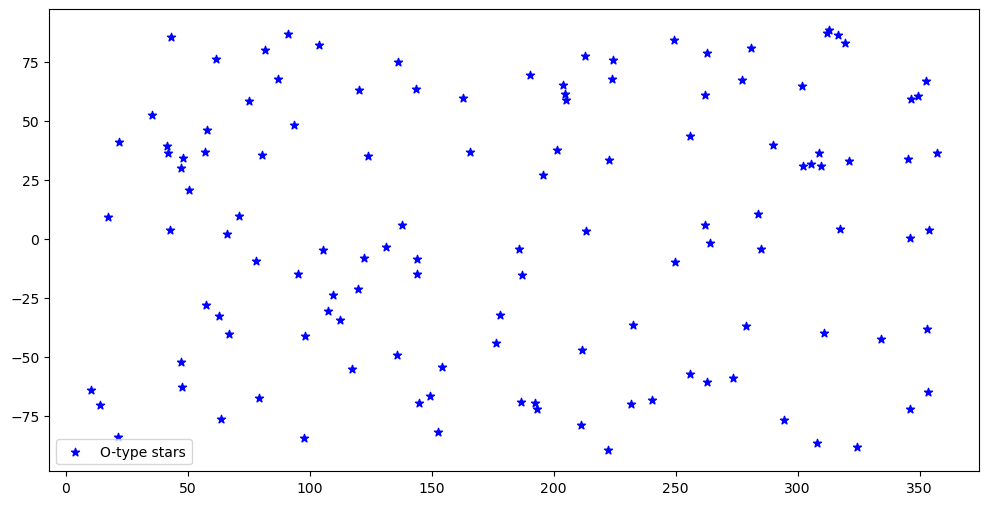

In [27]:
import pandas as pd

# read in the data as a pd dataframe
df = pd.read_csv('star_data_full.xls')

# get only the rows where the spectral type is O
df_O = df[df['Spectral Type'] == 'O']

# scatter plot of the data Ra De
plt.figure(figsize=(12, 6))
plt.scatter(df_O['Right Ascension'], df_O['Declination'], c='blue', label='O-type stars', marker="*")
plt.legend()
plt.show()

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

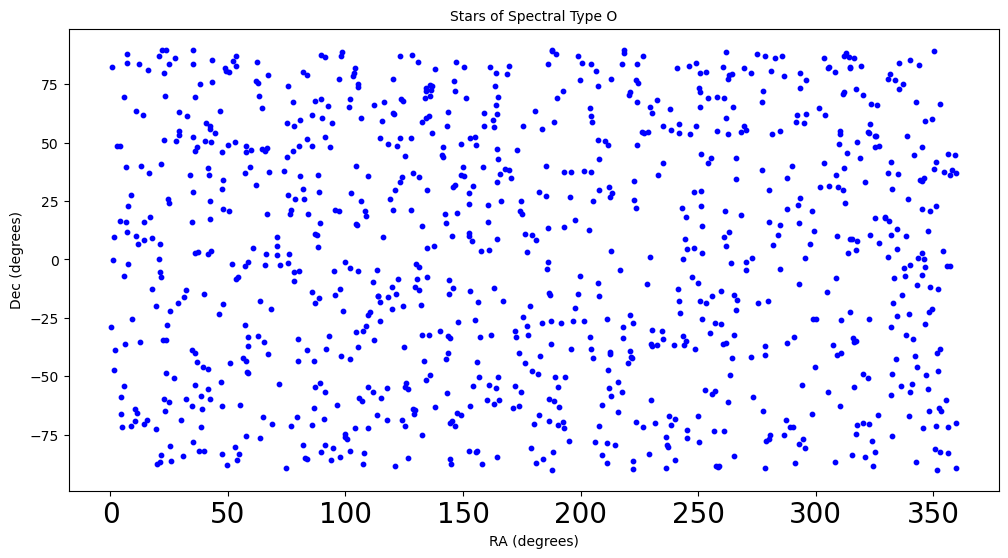

In [21]:
# scatter plot the stars of scpecral type O
plt.figure(figsize=(12,6))
plt.scatter(RA, Dec, c='blue', s=10, label='O')
plt.xlabel('RA (degrees)', fontsize=fontsize)
plt.ylabel('Dec (degrees)', fontsize=fontsize)
plt.title('Stars of Spectral Type O', fontsize=fontsize)
plt.xticks(fontsize=tick_font_size)
plt.show()

# scatter plot the stars of scpecral type B
plt.figure(figsize=(12,6))
plt.scatter(RA, Dec, c='red', s=10, label='B')
plt.xlabel('RA (degrees)', fontsize=fontsize)
plt.ylabel('Dec (degrees)', fontsize=fontsize)
plt.title('Stars of Spectral Type B', fontsize=fontsize)


In [12]:
color_map = {
    'O': 'blue',
    'B': 'lightblue',
    'A': 'cyan',
    'F': 'green',
    'G': 'yellow',
    'K': 'orange',
    'M': 'red'
}
spectral_types = list(color_map.keys())
colors = [color_map[stype] for stype in Stype]
# colors = [color_map[stype] for stype in spectral_types]

In [13]:
handles = [
    mlines.Line2D([], [], color=color_map[stype], marker='*', linestyle='None',
                  markersize=12, label=stype, markeredgecolor='k')
    for stype in spectral_types
]


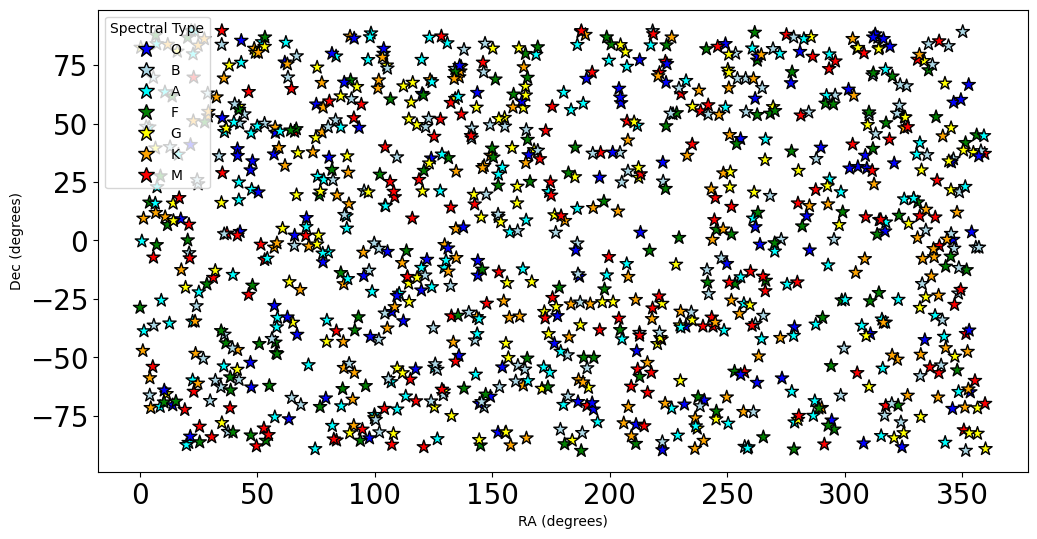

In [18]:
# try plotting different types of stars with different colors
fontsize= 10

plt.figure(figsize=(12, 6))
plt.scatter(RA, Dec, c=colors, s=100, edgecolors='k', marker='*')
plt.xlabel('RA (degrees)', fontsize=fontsize)
plt.ylabel('Dec (degrees)', fontsize=fontsize)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.legend(handles=handles, title='Spectral Type', fontsize=fontsize)

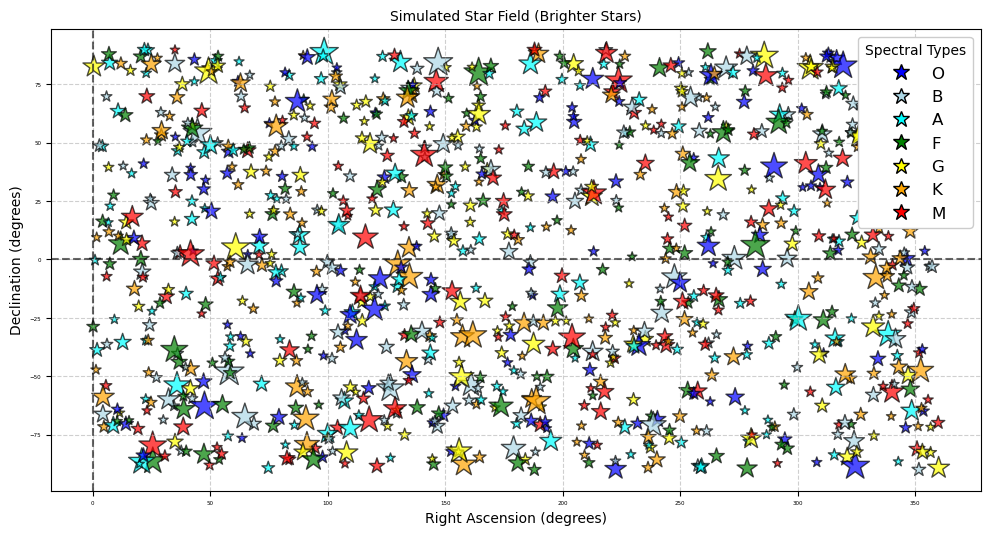

In [19]:
plt.figure(figsize=(12,6))

# scatter plot
plt.scatter(RA, Dec, c=colors, alpha=0.7, ec='k', marker='*',s= (500/Mag))

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0, linestyle='--', alpha=0.6, c='k')
plt.axvline(x=0, linestyle='--',alpha=0.6, c='k')

# Adding labels and title
plt.xlabel('Right Ascension (degrees)', fontsize=fontsize)
plt.ylabel('Declination (degrees)', fontsize=fontsize)
plt.title('Simulated Star Field (Brighter Stars)', fontsize=fontsize)
plt.xticks(fontsize=fontsize-6)
plt.yticks(fontsize=fontsize-6)

# Adding the legend
plt.legend(handles=handles, title='Spectral Types', fontsize='large', loc='upper right').get_frame().set_alpha(1)

# Show the plot
plt.show()